In [1]:
import pandas as pd
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df_exercicio = pd.read_csv('dados/exercicio_fisico.csv')

In [10]:
df_exercicio.head()

,id,UF,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,Está grávida?,Quantos dias por semana costuma praticar exercício físico ou esporte?,"Em geral, no dia que pratica exercício ou esporte, quanto tempo em minutos dura essa atividade?",...,"No dia em que faz essa(s) atividade(s), quanto tempo, em minutos, gasta no deslocamento a pé ou de bicicleta, considerando Ida e Volta?","Nas suas atividades domésticas, faz faxina pesada, carrega peso ou faz outra atividade pesada que requer esforço físico intenso? (não remunerada)","Em uma semana normal, nas suas atividades domésticas, em quantos dias faz faxina pesada ou realiza atividades que requerem esforço físico intenso? (não remunerada)","Quanto tempo gasta, em minutos, por dia, realizando essas atividades domésticas pesadas ou que requerem esforço físico intenso? (não remunerada)","Em média, quantas horas por dia costuma ficar assistindo televisão?","Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?","Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?",Conhece algum programa público de estímulo à prática de atividade física no seu município?,Participa desse programa público de estímulo à prática de atividade física no seu município?,Qual o principal motivo de não participar?
0,0,RO,71.91,1,1,60.0,145.0,2.0,1.0,30.0,...,0.0,2.0,NaN,0.0,3.0,1.0,1.0,2.0,NaN,NaN
1,9,RO,71.91,1,1,65.0,152.0,2.0,NaN,0.0,...,20.0,2.0,NaN,0.0,6.0,5.0,1.0,2.0,NaN,NaN
2,10,RO,71.91,1,1,77.0,155.0,2.0,NaN,0.0,...,90.0,2.0,NaN,0.0,2.0,2.0,2.0,2.0,NaN,NaN
3,18,RO,71.91,1,1,56.0,159.0,2.0,3.0,60.0,...,15.0,1.0,7.0,60.0,1.0,4.0,1.0,2.0,NaN,NaN
4,19,RO,71.91,1,1,55.0,176.0,2.0,1.0,30.0,...,0.0,2.0,NaN,0.0,2.0,1.0,1.0,1.0,2.0,2.0


In [11]:
df_exercicio.shape

(90846, 27)

In [12]:
df_exercicio.columns

Index(['id', 'UF', 'Esperança de vida ao nascer (Anos)', 'Situação Censitária',
       'Área', 'Peso Final', 'Altura Final', 'Está grávida?',
       'Quantos dias por semana costuma praticar exercício físico ou esporte?',
       'Em geral, no dia que pratica exercício ou esporte, quanto tempo em minutos dura essa atividade?',
       'Qual o exercício físico ou esporte que pratica com mais frequência?',
       'No seu trabalho, anda bastante a pé?',
       'No seu trabalho, faz faxina pesada, carrega peso ou faz outra atividade pesada que requer esforço físico intenso?',
       'Em um dia normal, quanto tempo, em minutos, passa andando bastante a pé ou realizando essas atividades pesadas ou que requerem esforço físico no seu trabalho?',
       'Quantos dias por semana faz algum trajeto a pé ou bicicleta?',
       'Quanto tempo, em minutos, gasta, por dia, para percorrer este trajeto a pé ou de bicicleta, considerando a ida e a volta do trabalho?',
       'Nas suas atividades habituais, 

In [14]:
df_exercicio = df_exercicio.drop(columns = ['Está grávida?', 'Em geral, no dia que pratica exercício ou esporte, quanto tempo em minutos dura essa atividade?', 'No seu trabalho, anda bastante a pé?', 'No seu trabalho, faz faxina pesada, carrega peso ou faz outra atividade pesada que requer esforço físico intenso?', 'Em um dia normal, quanto tempo, em minutos, passa andando bastante a pé ou realizando essas atividades pesadas ou que requerem esforço físico no seu trabalho?', 'Quanto tempo, em minutos, gasta, por dia, para percorrer este trajeto a pé ou de bicicleta, considerando a ida e a volta do trabalho?','Nas suas atividades habituais, quantos dias por semana faz alguma atividade que envolva deslocamento a pé ou bicicleta? (Exceto o trabalho)', 'No dia em que faz essa(s) atividade(s), quanto tempo, em minutos, gasta no deslocamento a pé ou de bicicleta, considerando Ida e Volta?', 'Nas suas atividades domésticas, faz faxina pesada, carrega peso ou faz outra atividade pesada que requer esforço físico intenso? (não remunerada)', 'Em uma semana normal, nas suas atividades domésticas, em quantos dias faz faxina pesada ou realiza atividades que requerem esforço físico intenso? (não remunerada)', 'Quanto tempo gasta, em minutos, por dia, realizando essas atividades domésticas pesadas ou que requerem esforço físico intenso? (não remunerada)', 'Conhece algum programa público de estímulo à prática de atividade física no seu município?', 'Participa desse programa público de estímulo à prática de atividade física no seu município?', 'Qual o principal motivo de não participar?'])

In [15]:
df_exercicio

,id,UF,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,Quantos dias por semana costuma praticar exercício físico ou esporte?,Qual o exercício físico ou esporte que pratica com mais frequência?,Quantos dias por semana faz algum trajeto a pé ou bicicleta?,"Em média, quantas horas por dia costuma ficar assistindo televisão?","Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?","Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?"
0,0,RO,71.91,1,1,60.0,145.0,1.0,1.0,NaN,3.0,1.0,1.0
1,9,RO,71.91,1,1,65.0,152.0,NaN,NaN,NaN,6.0,5.0,1.0
2,10,RO,71.91,1,1,77.0,155.0,NaN,NaN,NaN,2.0,2.0,2.0
3,18,RO,71.91,1,1,56.0,159.0,3.0,1.0,1.0,1.0,4.0,1.0
4,19,RO,71.91,1,1,55.0,176.0,1.0,1.0,NaN,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,DF,78.85,2,1,63.0,168.0,NaN,NaN,NaN,3.0,1.0,2.0
90842,293712,DF,78.85,2,1,72.0,168.0,NaN,NaN,NaN,6.0,4.0,1.0
90843,293713,DF,78.85,2,1,87.0,163.0,1.0,17.0,NaN,4.0,5.0,2.0
90844,293718,DF,78.85,2,1,89.0,168.0,2.0,1.0,NaN,2.0,6.0,2.0


In [ ]:
df_corr = df_exercicio.drop(columns = ['UF', 'Está grávida?', 'Qual o exercício físico ou esporte que pratica com mais frequência?', 'Qual o principal motivo de não participar?'])

In [8]:
df_corr['Situação Censitária'] = df_corr['Situação Censitária'].replace({1: 'Urbano', 2: 'Rural'})
df_corr['Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?'] = df_corr['Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?'].replace({1: 'Menos de uma hora', 2: 'De uma hora a menos de duas horas', 3: 'De duas horas a menos de três horas', 4: 'De três horas a menos de seis horas', 5: 'Seis horas ou mais', 6: 'Não assiste televisão'})
df_corr['Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?'] = df_corr['Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Conhece algum programa público de estímulo à prática de atividade física no seu município?'] = df_corr['Conhece algum programa público de estímulo à prática de atividade física no seu município?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Participa desse programa público de estímulo à prática de atividade física no seu município?'] = df_corr['Participa desse programa público de estímulo à prática de atividade física no seu município?'].replace({1: 'Sim', 2: 'Não'})

df_dummies1 = pd.get_dummies(df_corr['Situação Censitária'])
df_dummies2 = pd.get_dummies(df_corr['Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?'], prefix='horas_eletronicos')
df_dummies3 = pd.get_dummies(df_corr['Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?'], prefix='local_publico_esportes_perto')
df_dummies4 = pd.get_dummies(df_corr['Conhece algum programa público de estímulo à prática de atividade física no seu município?'], prefix='existe_programa_publico_esportes')
df_dummies5 = pd.get_dummies(df_corr['Participa desse programa público de estímulo à prática de atividade física no seu município?'], prefix='participa_programa_publico_esportes')

df_dummies = pd.concat([df_corr, df_dummies1], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies2], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies3], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies4], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies5], axis=1)

df_dummies.drop(columns = ['Situação Censitária', 'Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?', 'Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?', 'Conhece algum programa público de estímulo à prática de atividade física no seu município?', 'Participa desse programa público de estímulo à prática de atividade física no seu município?'], inplace = True)

df_dummies


,id,Esperança de vida ao nascer (Anos),Área,Peso Final,Altura Final,Quantos dias por semana costuma praticar exercício físico ou esporte?,Quantos dias por semana faz algum trajeto a pé ou bicicleta?,Rural,Urbano,horas_eletronicos_De duas horas a menos de três horas,...,horas_eletronicos_De uma hora a menos de duas horas,horas_eletronicos_Menos de uma hora,horas_eletronicos_Não assiste televisão,horas_eletronicos_Seis horas ou mais,local_publico_esportes_perto_Não,local_publico_esportes_perto_Sim,existe_programa_publico_esportes_Não,existe_programa_publico_esportes_Sim,participa_programa_publico_esportes_Não,participa_programa_publico_esportes_Sim
0,0,71.91,1,60.0,145.0,1.0,NaN,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,9,71.91,1,65.0,152.0,NaN,NaN,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2,10,71.91,1,77.0,155.0,NaN,NaN,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3,18,71.91,1,56.0,159.0,3.0,1.0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,19,71.91,1,55.0,176.0,1.0,NaN,0,1,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,78.85,1,63.0,168.0,NaN,NaN,1,0,0,...,0,1,0,0,1,0,1,0,0,0
90842,293712,78.85,1,72.0,168.0,NaN,NaN,1,0,0,...,0,0,0,0,0,1,1,0,0,0
90843,293713,78.85,1,87.0,163.0,1.0,NaN,1,0,0,...,0,0,0,1,1,0,1,0,0,0
90844,293718,78.85,1,89.0,168.0,2.0,NaN,1,0,0,...,0,0,1,0,1,0,0,1,1,0


In [9]:
df_dummies.to_csv('bases_agrupadas/exercicio_fisico.csv')

<Axes: >

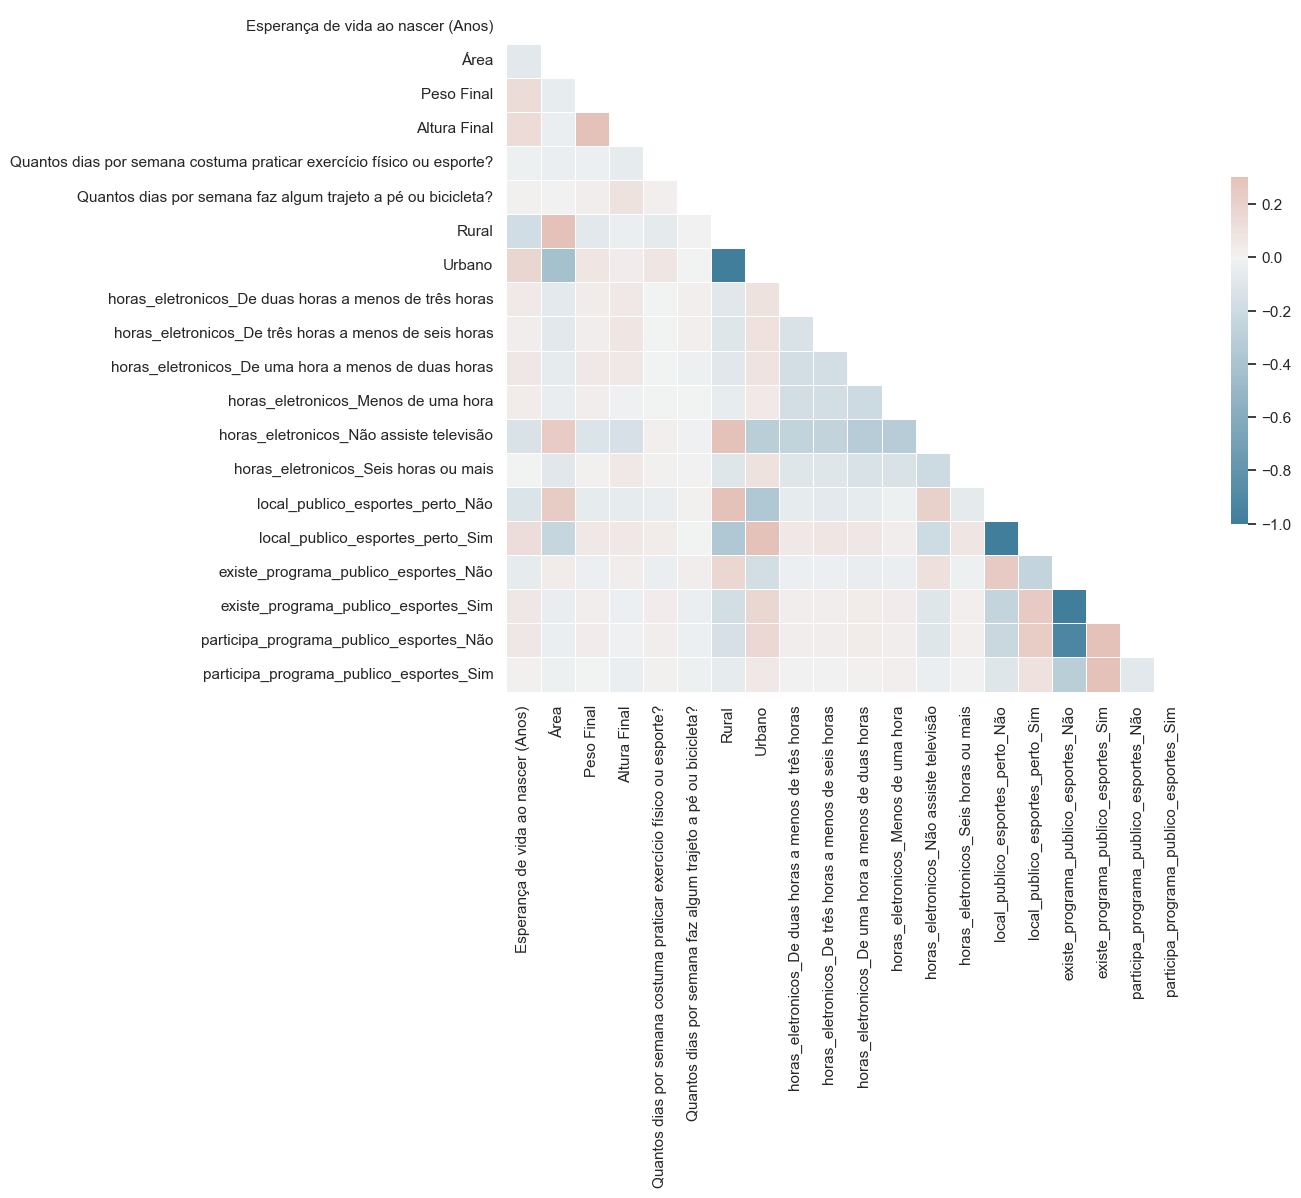

In [10]:
sns.set_theme(style="white")

df_dummies.drop(columns = ['id'], inplace = True)

# Compute the correlation matrix
corr = df_dummies.corr()
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            # , annot=True, fmt=".2f"
            )